In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from scipy import stats
import matplotlib as plt


In [209]:
#df1 = pd.read_csv("/Users/ethanboroditsky/ML_Focus/updated_stock_data_copy.csv")
df1 = pd.read_csv("/Users/ethanboroditsky/ML_Focus/updated_stock_data_3.csv")

df1.head()

,Date,Close/Last,Volume,Open,High,Low,Rtomorrow,Rtoday,Ryesterday,Volatility (H-L),Unnamed: 10
0,12/1/14,$28.77,334631120.0,$29.70,$29.81,$27.82,$(0.003824),NaN,NaN,$1.995,NaN
1,12/2/14,$28.66,236821280.0,$28.38,$28.94,$28.19,$0.011341,-0.003824,NaN,$0.750,NaN
2,12/3/14,$28.98,171824800.0,$28.94,$29.09,$28.78,$(0.003795),0.011341,-0.003824,$0.310,NaN
3,12/4/14,$28.87,168272080.0,$28.94,$29.30,$28.82,$(0.004243),-0.003795,0.011341,$0.477,NaN
4,12/5/14,$28.75,152923880.0,$29.00,$29.02,$28.66,$(0.022609),-0.004243,-0.003795,$0.360,NaN


In [210]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [211]:
df1.drop('Unnamed: 10', axis=1, inplace=True)
df1 = swap_columns(df1, "Rtomorrow", "Volatility (H-L)")
df1.rename(columns={'Close/Last': 'Close'}, inplace=True)
df1 = df1.dropna()
df1.head()

,Date,Close,Volume,Open,High,Low,Volatility (H-L),Rtoday,Ryesterday,Rtomorrow
2,12/3/14,$28.98,171824800.0,$28.94,$29.09,$28.78,$0.310,0.011341,-0.003824,$(0.003795)
3,12/4/14,$28.87,168272080.0,$28.94,$29.30,$28.82,$0.477,-0.003795,0.011341,$(0.004243)
4,12/5/14,$28.75,152923880.0,$29.00,$29.02,$28.66,$0.360,-0.004243,-0.003795,$(0.022609)
5,12/8/14,$28.10,229780120.0,$28.53,$28.66,$27.91,$0.757,-0.022609,-0.004243,$0.015302
6,12/9/14,$28.53,240448960.0,$27.55,$28.58,$27.34,$1.238,0.015302,-0.022609,$(0.019015)


In [212]:
#for col in df1.columns[1:]:
 #   df1[col] = df1[col].str.replace('$', '', regex=False).astype(float)

# Function to clean the monetary values (removes '$', ',')
def clean_money_column(col):
    return col.replace({'\$': '', ',': ''}, regex=True).astype(float)

# Remove '$' and ',' from string columns, then convert to float

print(type(df1["Close"]))
df1['Close'] = df1['Close'].replace({'\$': '', ',': ''}, regex=True)
df1['Close'] = df1['Close'].astype(float)

df1['Open'] = df1['Open'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df1['High'] = df1['High'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df1['Low'] = df1['Low'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df1['Volatility (H-L)'] = df1['Volatility (H-L)'].replace({'\$': '', ',': ''}, regex=True)

df1['Volatility (H-L)'] = df1['Volatility (H-L)'].astype(float)
#df1['Rtoday'] = df1['Rtoday'].replace({'\$': '', ',': '', '(': '-', ')': ''}, regex=True).astype(float)
#df1['Ryesterday'] = df1['Ryesterday'].replace({'\$': '', ',': '', '(': '-', ')': ''}, regex=True).astype(float)
#df1['Rtomorrow'] = df1['Rtomorrow'].replace({'\$': '', ',': '', '\\(': '', '\\)': '', '-':'', ' ', ''}, regex=True)
df1['Rtomorrow'] = df1['Rtomorrow'].replace({'\$': '', ',': '', '\(': '', '\)': '', ' ': '', '-':'', ' ': '0'}, regex=True)
print(df1.head())
print(df1.tail())
print(df1.dtypes)

df1['Rtomorrow'] = df1['Rtomorrow'].astype(float)

# Convert 'Volume' to integer
#df1['Volume'] = df1['Volume'].astype(float)

# Display the cleaned dataframe
df1.head()

<class 'pandas.core.series.Series'>
      Date  Close       Volume   Open   High    Low  Volatility (H-L)  \
2  12/3/14  28.98  171824800.0  28.94  29.09  28.78             0.310   
3  12/4/14  28.87  168272080.0  28.94  29.30  28.82             0.477   
4  12/5/14  28.75  152923880.0  29.00  29.02  28.66             0.360   
5  12/8/14  28.10  229780120.0  28.53  28.66  27.91             0.757   
6  12/9/14  28.53  240448960.0  27.55  28.58  27.34             1.238   

     Rtoday  Ryesterday   Rtomorrow  
2  0.011341   -0.003824   00.003795  
3 -0.003795    0.011341   00.004243  
4 -0.004243   -0.003795   00.022609  
5 -0.022609   -0.004243  00.0153020  
6  0.015302   -0.022609   00.019015  
          Date   Close      Volume    Open    High     Low  Volatility (H-L)  \
2511  11/21/24  228.52  42108330.0  228.88  230.16  225.71             4.445   
2512  11/22/24  229.87  38168250.0  228.06  230.72  228.06             2.660   
2513  11/25/24  232.87  90152830.0  231.46  233.25  229.7

,Date,Close,Volume,Open,High,Low,Volatility (H-L),Rtoday,Ryesterday,Rtomorrow
2,12/3/14,28.98,171824800.0,28.94,29.09,28.78,0.310,0.011341,-0.003824,0.003795
3,12/4/14,28.87,168272080.0,28.94,29.30,28.82,0.477,-0.003795,0.011341,0.004243
4,12/5/14,28.75,152923880.0,29.00,29.02,28.66,0.360,-0.004243,-0.003795,0.022609
5,12/8/14,28.10,229780120.0,28.53,28.66,27.91,0.757,-0.022609,-0.004243,0.015302
6,12/9/14,28.53,240448960.0,27.55,28.58,27.34,1.238,0.015302,-0.022609,0.019015


In [247]:
IVs = ['Close', "Volume", "Open", "High", 'Low', "Volatility (H-L)", "Rtoday", "Ryesterday"]

IVs = ['Close', "Volume", "Open", "High", "Volatility (H-L)"]

x_train, x_test, y_train, y_test = train_test_split(df1.loc[:, IVs], df1.loc[:, 'Rtomorrow'], test_size=0.25, random_state=0)


print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

print(df1)

(1885, 5) (1885,)
(629, 5) (629,)
          Date   Close       Volume    Open    High     Low  Volatility (H-L)  \
2      12/3/14   28.98  171824800.0   28.94   29.09   28.78             0.310   
3      12/4/14   28.87  168272080.0   28.94   29.30   28.82             0.477   
4      12/5/14   28.75  152923880.0   29.00   29.02   28.66             0.360   
5      12/8/14   28.10  229780120.0   28.53   28.66   27.91             0.757   
6      12/9/14   28.53  240448960.0   27.55   28.58   27.34             1.238   
7     12/10/14   27.99  177901440.0   28.60   28.71   27.89             0.827   
8     12/11/14   27.91  165618760.0   28.07   28.45   27.84             0.615   
9     12/12/14   27.43  223495280.0   27.62   27.97   27.40             0.573   
10    12/15/14   27.06  268333040.0   27.68   27.90   26.59             1.313   
11    12/16/14   26.69  242607160.0   26.59   27.54   26.57             0.975   
12    12/17/14   27.35  213063720.0   26.78   27.46   26.71             0.7

In [248]:
linear_model = LinearRegression(normalize=True)
p2_model = LinearRegression(normalize=True)
p3_model = LinearRegression(normalize=True)

# create polynomial features
p2_features = PolynomialFeatures(degree=2)
p2_train = p2_features.fit_transform(x_train)
p2_test = p2_features.fit_transform(x_test)

p3_features = PolynomialFeatures(degree=3)
p3_train = p3_features.fit_transform(x_train)
p3_test = p3_features.fit_transform(x_test)

# now do estimation of models
lin_1 = linear_model.fit(x_train, y_train)
p2_1 = p2_model.fit(p2_train, y_train)
p3_1 = p3_model.fit(p3_train, y_train)

# predict values for test sets
lin1_predict = lin_1.predict(x_test)
p2_predict = p2_1.predict(p2_test)
p3_predict = p3_1.predict(p3_test)

print(mean_squared_error(lin1_predict, y_test))
print(mean_squared_error(p2_predict, y_test))
print(mean_squared_error(p3_predict, y_test))

0.00015002985738199785
0.00014908626079929345
0.00016743987088168642


In [249]:
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_1 = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(x_train, y_train)

# results
print(lasso_1.score(x_train, y_train))
print(lasso_1.score(x_test, y_test))
print("----------------")



optimal_alpha = lasso_1.alpha_
print(f"Optimal alpha: {optimal_alpha}")

# 2. Get the model's coefficients
coefficients = lasso_1.coef_
print(coefficients)

# 3. Identify which features were included and which were excluded
# You can get the names of the features and filter them based on non-zero coefficients.
included_features = [feature for feature, coef in zip(x_train.columns, coefficients) if coef != 0]
excluded_features = [feature for feature, coef in zip(x_train.columns, coefficients) if coef == 0]

# Print the results
print(f"Included features: {included_features}")
print(f"Excluded features: {excluded_features}")

0.08231270165782789
0.15897547845049997
----------------
Optimal alpha: 0.0001
[-2.66158920e-06  3.88310660e-11 -0.00000000e+00 -3.02505847e-06
  1.63605292e-03]
Included features: ['Close', 'Volume', 'High', 'Volatility (H-L)']
Excluded features: ['Open']


/Users/ethanboroditsky/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11059602347004134, tolerance: 2.389093082666492e-05
  tol, rng, random, positive)
/Users/ethanboroditsky/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10826044766701512, tolerance: 2.3722546146423012e-05
  tol, rng, random, positive)
/Users/ethanboroditsky/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10947120058359838, tolerance: 2.379281075418428e-05
  tol, rng, random, positive)
/Users/ethanboroditsky/anaconda3/lib/python3.7/site-packages/sklearn/linear

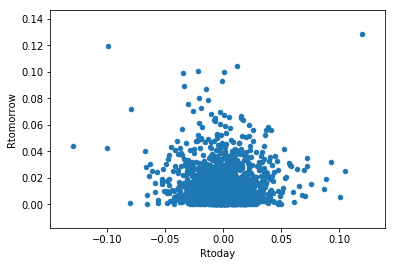

In [231]:
from matplotlib import pyplot as plt

df1.plot(kind='scatter', x="Rtoday", y='Rtomorrow')

plt.show()

In [225]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [228]:
X = df1.drop(['Rtomorrow', 'Date'], axis=1)  # Features

y = df1['Rtomorrow']  

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBRegressor()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² score

r2_train = r2_score(y_train, model.predict(X_train))

# Print results
print("Mean Squared Error: %.2f" % mse)
print("R² Score: %.2f" % r2)


Mean Squared Error: 0.00
R² Score: -0.09


In [230]:
df1.corr()

,Close,Volume,Open,High,Low,Volatility (H-L),Rtoday,Ryesterday,Rtomorrow
Close,1.000000,-0.525582,0.999696,0.999859,0.999858,0.718730,0.015388,0.014371,0.015081
Volume,-0.525582,1.000000,-0.524982,-0.521809,-0.528780,-0.126973,-0.062396,-0.069994,0.234841
Open,0.999696,-0.524982,1.000000,0.999860,0.999857,0.718836,-0.000455,0.015603,0.015120
High,0.999859,-0.521809,0.999860,1.000000,0.999813,0.725466,0.006199,0.014382,0.017639
Low,0.999858,-0.528780,0.999857,0.999813,1.000000,0.712020,0.007426,0.016014,0.012619
Volatility (H-L),0.718730,-0.126973,0.718836,0.725466,0.712020,1.000000,-0.039266,-0.047692,0.191351
Rtoday,0.015388,-0.062396,-0.000455,0.006199,0.007426,-0.039266,1.000000,-0.066434,-0.063938
Ryesterday,0.014371,-0.069994,0.015603,0.014382,0.016014,-0.047692,-0.066434,1.000000,-0.108244
Rtomorrow,0.015081,0.234841,0.015120,0.017639,0.012619,0.191351,-0.063938,-0.108244,1.000000


In [235]:
#volatility = high-low/high+low

#volume = volume/mean last 22 days

#volume: large v days: ret up

# make Y var= AAPL ret - SPY returns
#bc this helps u understand 

#shift volume to be yesterday

In [237]:
feature_names = df1.loc[:, IVs].columns.tolist()

# Print linear regression equation
linear_coefficients = lin_1.coef_
linear_intercept = lin_1.intercept_
linear_equation = f"y = {linear_intercept:.4f} + " + " + ".join([f"{coef:.4f}*{feature_names[i]}" for i, coef in enumerate(linear_coefficients)])
print("Linear Regression Equation:")
print(linear_equation)

# Print polynomial regression equations
def print_polynomial_equation(coefficients, intercept, feature_names, degree):
    terms = []
    for i, coef in enumerate(coefficients):
        if i > 0:  # Skip the intercept
            # Use the feature names for polynomial features
            terms.append(f"{coef:.4f}*{feature_names[i]}")  # Use feature_names directly without adjusting index
    equation = f"y = {intercept:.4f} + " + " + ".join(terms)
    print(f"Polynomial Regression (Degree {degree}) Equation:")
    print(equation)

# For Polynomial Regression (Degree 2)
p2_features = PolynomialFeatures(degree=2)
p2_train = p2_features.fit_transform(x_train)  # Fit to the training data
p2_feature_names = p2_features.get_feature_names(feature_names)
p2_intercept = p2_1.intercept_
p2_coefficients = p2_1.coef_
# Get new feature names

print_polynomial_equation(p2_coefficients, p2_intercept, p2_feature_names, 2)

# For Polynomial Regression (Degree 3)
p3_features = PolynomialFeatures(degree=3)
p3_train = p3_features.fit_transform(x_train)  # Fit to the training data
p3_feature_names = p3_features.get_feature_names(feature_names)  # Get new feature names
p3_intercept = p3_1.intercept_
p3_coefficients = p3_1.coef_

print_polynomial_equation(p3_coefficients, p3_intercept, p3_feature_names, 3)



Linear Regression Equation:
y = 0.0044 + 0.0001*Close + 0.0000*Volume + -0.0003*Open + 0.0169*High + -0.0168*Low + -0.0153*Volatility (H-L) + -0.0143*Rtoday + -0.0788*Ryesterday
Polynomial Regression (Degree 2) Equation:
y = 0.2185 + -0.0006*Close + 0.0000*Volume + -0.0019*Open + 0.1456*High + -0.1430*Low + -0.1401*Volatility (H-L) + -0.2281*Rtoday + -0.0506*Ryesterday + -0.0004*Close^2 + 0.0000*Close Volume + 0.0005*Close Open + 0.0598*Close High + -0.0595*Close Low + -0.0599*Close Volatility (H-L) + 0.0611*Close Rtoday + 0.0133*Close Ryesterday + -0.0000*Volume^2 + -0.0000*Volume Open + -0.0000*Volume High + 0.0000*Volume Low + 0.0000*Volume Volatility (H-L) + 0.0000*Volume Rtoday + 0.0000*Volume Ryesterday + 0.0007*Open^2 + 0.4175*Open High + -0.4193*Open Low + -0.4188*Open Volatility (H-L) + 0.0813*Open Rtoday + 0.0404*Open Ryesterday + 14.3523*High^2 + -29.1805*High Low + -29.0078*High Volatility (H-L) + 8.2134*High Rtoday + -5.0611*High Ryesterday + 14.8290*Low^2 + 29.4851*Low Vo

In [238]:

# For Linear Regression
lin_predictions = lin_1.predict(x_test)
lin_mse = mean_squared_error(y_test, lin_predictions)
print(f"Linear Regression MSE: {lin_mse:.4f}")

# For Polynomial Regression (Degree 2)
p2_predictions = p2_model.predict(p2_features.transform(x_test))  # Transform x_test for polynomial features
p2_mse = mean_squared_error(y_test, p2_predictions)
print(f"Polynomial Regression (Degree 2) MSE: {p2_mse:.4f}")

# For Polynomial Regression (Degree 3)
p3_predictions = p3_model.predict(p3_features.transform(x_test))  # Transform x_test for polynomial features
p3_mse = mean_squared_error(y_test, p3_predictions)
print(f"Polynomial Regression (Degree 3) MSE: {p3_mse:.4f}")


Linear Regression MSE: 0.0002
Polynomial Regression (Degree 2) MSE: 0.0002
Polynomial Regression (Degree 3) MSE: 0.0008


In [4]:
df1["Rtomorrow"].var()

NameError: name 'df1' is not defined

In [3]:
type(x_test)

NameError: name 'x_test' is not defined